This notebook is meant to explore how to implement the required 1D pooling of neurons, that would happen in parallel. 2D pooling (taking height into account) shall be done later

In [1]:
import numpy as np

In [2]:
GAME_WIDTH = 160

In [3]:
np.log2(GAME_WIDTH)

7.3219280948873626

In [7]:
160. / (2**5)

5.0

In [15]:
for i in range(160 / (2**5) + 1):
    print 160 / (2 ** (i))

160
80
40
20
10
5


I don't really need to subsample by dividing by 2. This happens in parallel, so the sizes chosen could be arbitrary. Any room for topographic maps?

Let's try something where the sizes of the pools are equal

In [131]:
def create_pooling_connections(original_vector, size_of_pool):
    p = np.arange(original_vector.size)
    pooling_vector = p.reshape(p.size//size_of_pool, size_of_pool)
    return pooling_vector
    
    # np.zeros((original_vector.size//size_of_pool, size_of_pool))
    

In [132]:
positions = np.arange(160)
pool_size = 80

In [133]:
p2=create_pooling_connections(positions, pool_size)

In [134]:
p4=create_pooling_connections(positions, pool_size/2)

In [135]:
p8=create_pooling_connections(positions, pool_size/4)

This seems **way** to easy. Will try to plot this, to check it's doing what I want it to do.

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

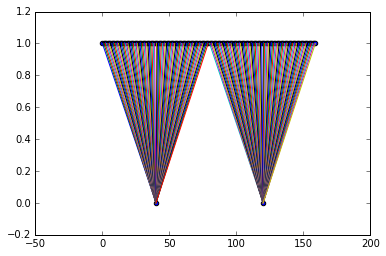

In [137]:
fig = plt.figure()
ax  = fig.add_subplot(111)

middle=p2.shape[1]//2

for x in np.ndenumerate(p2):
    y = p2[x[0][0], middle]
    ax.plot([x[1], y],[1, 0])
#     for j,k,h in zip(positions, np.ones(positions.size),p2[:, middle],np.zeros(p2.shape[0])):
#         ax.plot([i,k],[j,h],color = 'g')

ax.scatter(positions, np.ones(positions.size))
ax.scatter(p2[:, middle], np.zeros(p2.shape[0]))

In [138]:
def plot_pools(original_vector, pooling_vector):
    fig = plt.figure()
#     ax  = fig.add_subplot(111)

    middle=pooling_vector.shape[1]//2

    for x in np.ndenumerate(pooling_vector):
        y = pooling_vector[x[0][0],middle]
        plt.plot([x[1], y],[1, 0], color='b', alpha=.5)
    #     for j,k,h in zip(positions, np.ones(positions.size),p2[:, middle],np.zeros(p2.shape[0])):
    #         ax.plot([i,k],[j,h],color = 'g')

    plt.scatter(original_vector, np.ones(original_vector.size))
    plt.scatter(pooling_vector[:, middle], np.zeros(pooling_vector.shape[0]))
    labels = ['Original Vector', 'Pooling vector']
    plt.yticks([1,0], labels)
    plt.xticks([])

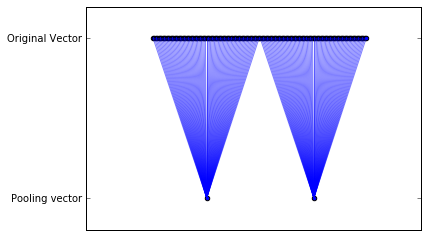

In [139]:
plot_pools(positions, p2)

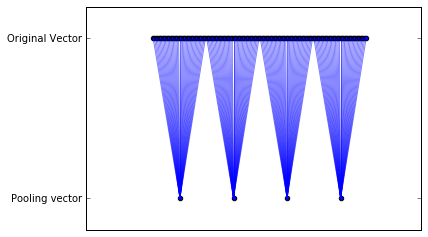

In [140]:
plot_pools(positions, p4)

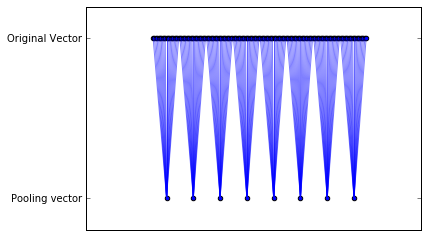

In [141]:
plot_pools(positions, p8)

In [151]:
GAME_WIDTH = 160
GAME_HEIGHT = 128
SPECIAL_EVENT_SCORE_UP = 0
SPECIAL_EVENT_SCORE_DOWN = 1
SPECIAL_EVENT_MAX = 2

COLOUR_ON = 1
COLOUR_OFF = 0

KEY_LEFT = 0
KEY_RIGHT = 1

on_neuron_ids = None
def get_on_neuron_ids(width=GAME_WIDTH, height=GAME_HEIGHT):
    on_neuron_ids = np.zeros((height, width), dtype=np.int32)
    colour = COLOUR_ON
    for i in range(width):
        for j in range(height):
            on_neuron_ids[j, i] = SPECIAL_EVENT_MAX + (i << 9) + (j << 1) + colour
    return on_neuron_ids
ids = get_on_neuron_ids()

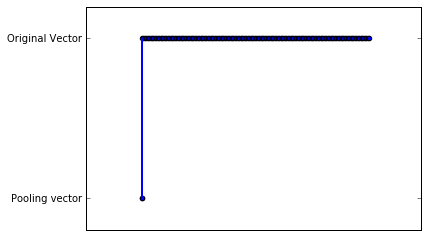

In [147]:
first_row_pool = create_pooling_connections(ids[0, :], 80)
plot_pools(ids[0, :], first_row_pool)

In [112]:
ids[0, :]

array([    3,   515,  1027,  1539,  2051,  2563,  3075,  3587,  4099,
        4611,  5123,  5635,  6147,  6659,  7171,  7683,  8195,  8707,
        9219,  9731, 10243, 10755, 11267, 11779, 12291, 12803, 13315,
       13827, 14339, 14851, 15363, 15875, 16387, 16899, 17411, 17923,
       18435, 18947, 19459, 19971, 20483, 20995, 21507, 22019, 22531,
       23043, 23555, 24067, 24579, 25091, 25603, 26115, 26627, 27139,
       27651, 28163, 28675, 29187, 29699, 30211, 30723, 31235, 31747,
       32259, 32771, 33283, 33795, 34307, 34819, 35331, 35843, 36355,
       36867, 37379, 37891, 38403, 38915, 39427, 39939, 40451, 40963,
       41475, 41987, 42499, 43011, 43523, 44035, 44547, 45059, 45571,
       46083, 46595, 47107, 47619, 48131, 48643, 49155, 49667, 50179,
       50691, 51203, 51715, 52227, 52739, 53251, 53763, 54275, 54787,
       55299, 55811, 56323, 56835, 57347, 57859, 58371, 58883, 59395,
       59907, 60419, 60931, 61443, 61955, 62467, 62979, 63491, 64003,
       64515, 65027,

In [119]:
np.median(ids[0, :])

40707.0

In [153]:
weight_to_spike = 2.
delay = 1

In [154]:
ids = get_on_neuron_ids()

no_paddle_on_ids = ids[0:-1, :]

list_of_on_connections = []

for i in range(GAME_WIDTH):
    for j in no_paddle_on_ids[:, i]:
        list_of_on_connections.append((j, i, weight_to_spike, delay))



left_right_connections = []
for i in range(GAME_WIDTH):
    if i < GAME_WIDTH // 2:
        left_right_connections.append((i, 1, weight_to_spike, delay))
    else:
        left_right_connections.append((i, 2, weight_to_spike, delay))

In [155]:
list_of_on_connections

[(3, 0, 2.0, 1),
 (5, 0, 2.0, 1),
 (7, 0, 2.0, 1),
 (9, 0, 2.0, 1),
 (11, 0, 2.0, 1),
 (13, 0, 2.0, 1),
 (15, 0, 2.0, 1),
 (17, 0, 2.0, 1),
 (19, 0, 2.0, 1),
 (21, 0, 2.0, 1),
 (23, 0, 2.0, 1),
 (25, 0, 2.0, 1),
 (27, 0, 2.0, 1),
 (29, 0, 2.0, 1),
 (31, 0, 2.0, 1),
 (33, 0, 2.0, 1),
 (35, 0, 2.0, 1),
 (37, 0, 2.0, 1),
 (39, 0, 2.0, 1),
 (41, 0, 2.0, 1),
 (43, 0, 2.0, 1),
 (45, 0, 2.0, 1),
 (47, 0, 2.0, 1),
 (49, 0, 2.0, 1),
 (51, 0, 2.0, 1),
 (53, 0, 2.0, 1),
 (55, 0, 2.0, 1),
 (57, 0, 2.0, 1),
 (59, 0, 2.0, 1),
 (61, 0, 2.0, 1),
 (63, 0, 2.0, 1),
 (65, 0, 2.0, 1),
 (67, 0, 2.0, 1),
 (69, 0, 2.0, 1),
 (71, 0, 2.0, 1),
 (73, 0, 2.0, 1),
 (75, 0, 2.0, 1),
 (77, 0, 2.0, 1),
 (79, 0, 2.0, 1),
 (81, 0, 2.0, 1),
 (83, 0, 2.0, 1),
 (85, 0, 2.0, 1),
 (87, 0, 2.0, 1),
 (89, 0, 2.0, 1),
 (91, 0, 2.0, 1),
 (93, 0, 2.0, 1),
 (95, 0, 2.0, 1),
 (97, 0, 2.0, 1),
 (99, 0, 2.0, 1),
 (101, 0, 2.0, 1),
 (103, 0, 2.0, 1),
 (105, 0, 2.0, 1),
 (107, 0, 2.0, 1),
 (109, 0, 2.0, 1),
 (111, 0, 2.0, 1),
 (113, 0

In [156]:
left_right_connections

[(0, 1, 2.0, 1),
 (1, 1, 2.0, 1),
 (2, 1, 2.0, 1),
 (3, 1, 2.0, 1),
 (4, 1, 2.0, 1),
 (5, 1, 2.0, 1),
 (6, 1, 2.0, 1),
 (7, 1, 2.0, 1),
 (8, 1, 2.0, 1),
 (9, 1, 2.0, 1),
 (10, 1, 2.0, 1),
 (11, 1, 2.0, 1),
 (12, 1, 2.0, 1),
 (13, 1, 2.0, 1),
 (14, 1, 2.0, 1),
 (15, 1, 2.0, 1),
 (16, 1, 2.0, 1),
 (17, 1, 2.0, 1),
 (18, 1, 2.0, 1),
 (19, 1, 2.0, 1),
 (20, 1, 2.0, 1),
 (21, 1, 2.0, 1),
 (22, 1, 2.0, 1),
 (23, 1, 2.0, 1),
 (24, 1, 2.0, 1),
 (25, 1, 2.0, 1),
 (26, 1, 2.0, 1),
 (27, 1, 2.0, 1),
 (28, 1, 2.0, 1),
 (29, 1, 2.0, 1),
 (30, 1, 2.0, 1),
 (31, 1, 2.0, 1),
 (32, 1, 2.0, 1),
 (33, 1, 2.0, 1),
 (34, 1, 2.0, 1),
 (35, 1, 2.0, 1),
 (36, 1, 2.0, 1),
 (37, 1, 2.0, 1),
 (38, 1, 2.0, 1),
 (39, 1, 2.0, 1),
 (40, 1, 2.0, 1),
 (41, 1, 2.0, 1),
 (42, 1, 2.0, 1),
 (43, 1, 2.0, 1),
 (44, 1, 2.0, 1),
 (45, 1, 2.0, 1),
 (46, 1, 2.0, 1),
 (47, 1, 2.0, 1),
 (48, 1, 2.0, 1),
 (49, 1, 2.0, 1),
 (50, 1, 2.0, 1),
 (51, 1, 2.0, 1),
 (52, 1, 2.0, 1),
 (53, 1, 2.0, 1),
 (54, 1, 2.0, 1),
 (55, 1, 2.0, 1),
 (